___
<h1> Machine Learning </h1>
<h2> Systems Engineering and Computer Technologies / Engenharia de Sistemas e Tecnologias Informáticas
(LESTI)</h2>
<h3> Instituto Superior de Engenharia / Universidade do Algarve </h3>

[LESTI](https://ise.ualg.pt/curso/1941) / [ISE](https://ise.ualg.pt) / [UAlg](https://www.ualg.pt)

Pedro J. S. Cardoso (pcardoso@ualg.pt)

___

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

# Linear regression

## Ordinary least squares (OLS)

Let us generate some data and split it before fitting it.

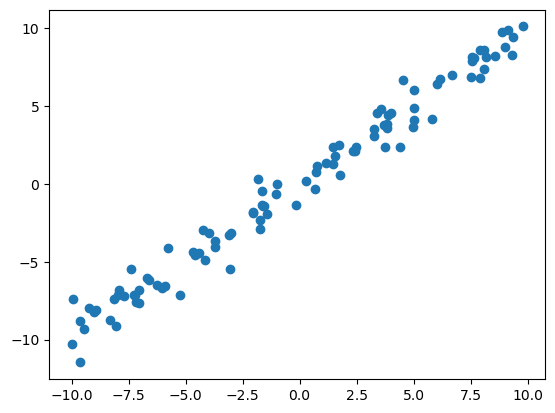

In [2]:
def make_wave(n_samples=100):
    """ builds a sample with n_samples in the form y = x + random()"""
    rnd = np.random.RandomState(1)
    x = rnd.uniform(-10, 10, size=n_samples)
    y_no_noise = x
    y = y_no_noise + (rnd.normal(size=len(x)))
    x = x.reshape(-1, 1) # reshape to a (n,1) shape
    return x, y 

X, y = make_wave(n_samples=100)

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

plt.scatter(X, y)
# plt.show()

Use the Ordinary least squares Linear Regression model

In [3]:
ols = LinearRegression().fit(x_train, y_train)

print("lr.coef_: {}".format(ols.coef_))
print("lr.intercept_: {}".format(ols.intercept_))

lr.coef_: [0.97417784]
lr.intercept_: 0.1297623246807185


An R^2 of around 0.9 might not be not very bad...

(see: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)

In [4]:
print("Training set score: {:.2f}".format(ols.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ols.score(x_test, y_test)))

Training set score: 0.97
Test set score: 0.98


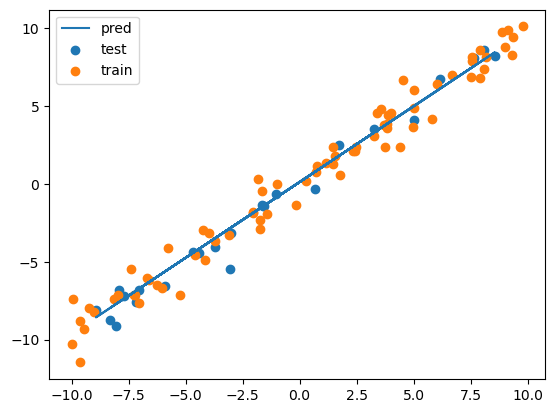

In [5]:
y_pred = ols.predict(x_test)

plt.plot(x_test, y_pred, label='pred')
plt.scatter(x_test, y_test, label='test')
plt.scatter(x_train, y_train, label='train')

plt.legend()
plt.show()

## Boston Housing dataset

See the dataset description at: https://lib.stat.cmu.edu/datasets/boston

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's



In [6]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [7]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### Applying OLS to the Boston data set

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

LinearRegression fits a linear model with coefficients $w = (w_1, \ldots, w_p)$ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation, i.e., setting $\hat y = \sum_i w_i x_i + b$, OLS optimizes  $\min_{w}||y - Xw||^2_2$

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    train_size=.7
                                                   )

ols = LinearRegression().fit(x_train, y_train)

When comparing training set and test set scores, we find that we predict more accurately on the training than in the test set, as expected!!

In [10]:
print("Training set score: {:.2f}".format(ols.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ols.score(x_test, y_test)))

Training set score: 0.76
Test set score: 0.67


### Applying Ridge regression to the Boston data set

Recall that, Ridge regression minimizes the objective function: 
$||y - Xw||^2_2 + \alpha * ||w||^2_2$

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html



In [11]:
rr = Ridge(alpha=1).fit(x_train, y_train)

print("rr.coef_: {}".format(rr.coef_))
print("rr.intercept_: {}".format(rr.intercept_))


rr.coef_: [-1.18308575e-01  4.61259764e-02 -2.08626416e-02  2.45868617e+00
 -8.25958494e+00  3.89748516e+00 -1.79140171e-02 -1.39737175e+00
  2.18432298e-01 -1.16338128e-02 -9.31711410e-01  7.26996266e-03
 -4.94046539e-01]
rr.intercept_: 32.536986346068716


In [12]:
print("Training set score: {:.2f}".format(rr.score(x_train, y_train)))
print("Test set score: {:.2f}".format(rr.score(x_test, y_test)))

Training set score: 0.76
Test set score: 0.67


### Comparing OLS and Ridge 

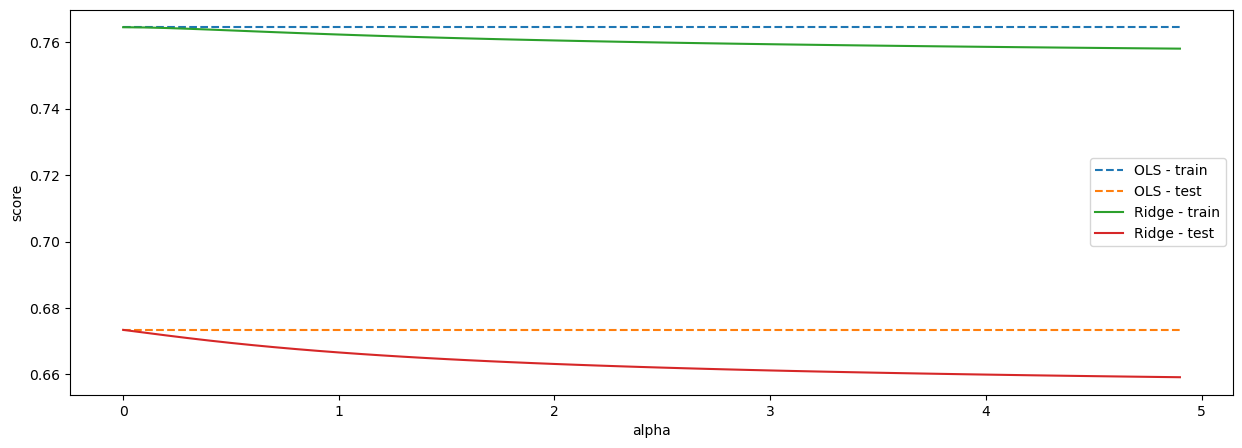

In [13]:
plt.figure(figsize=(15,5))

ridge_scores_train = []
ridge_scores_test = []

alphas = np.arange(0, 5, .1)

ols = LinearRegression().fit(x_train, y_train)

# ols.score(x_test, y_test)

for alpha in alphas:
    rr = Ridge(alpha=alpha).fit(x_train, y_train)
    ridge_scores_train.append(rr.score(x_train, y_train))
    ridge_scores_test.append(rr.score(x_test, y_test))

plt.plot(alphas, ols.score(x_train, y_train) * np.ones(len(alphas)), '--', label='OLS - train')
plt.plot(alphas, ols.score(x_test, y_test) * np.ones(len(alphas)), '--', label='OLS - test')

plt.plot(alphas, ridge_scores_train, label='Ridge - train')
plt.plot(alphas, ridge_scores_test, label='Ridge - test')

plt.legend()

plt.ylabel('score')
plt.xlabel('alpha')

plt.show()

### Exercises

Fix $\alpha = 0.1$ and then investigate how the size of the training dataset affects the score

## Extended Boston dataset

If we look at Boston data we can see that, i.e., different value magnituds appear on columns 

In [14]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


So, let us do some data transformation, namely:
- scalling
- polynomial combinations of the features

In [15]:
def do_extended_boston(X, y):
    from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
    
    m, n = X.shape

    # Transforms features by scaling each feature to a given range.
    X = MinMaxScaler().fit_transform(X)
    
    # Generate a new feature matrix consisting of all polynomial combinations of the features 
    # with degree less than or equal to the specified degree. 
    # For example, if an input sample is two dimensional and of the form [a, b], 
    # the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
    poly_fit = PolynomialFeatures(degree=2, include_bias=False)
    X = poly_fit.fit_transform(X)
    return X, y, poly_fit.get_feature_names_out([f"input_{i}" for i in range(n)])

X, y, feature_names = do_extended_boston(X, y)
print(X.shape)

df = pd.DataFrame(X, columns=feature_names)
df.head()

(506, 104)


,input_0,input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,input_9,...,input_9^2,input_9 input_10,input_9 input_11,input_9 input_12,input_10^2,input_10 input_11,input_10 input_12,input_11^2,input_11 input_12,input_12^2
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,...,0.043270,0.059749,0.208015,0.018655,0.082503,0.287234,0.025759,1.000000,0.089680,0.008042
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.011017,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.011017,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868


Now, the extended Boston Housing dataset: dataset has 506 samples and 104 derived features.

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Applying OLS on the extended Boston dataset

In [17]:
ols = LinearRegression().fit(x_train, y_train)

When comparing training set and test set scores, we find that we predict very accurately
on the training set (overfitting?), but the R2 on the test set is much worse

In [18]:
print("Training set score: {:.2f}".format(ols.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ols.score(x_test, y_test)))

Training set score: 0.95
Test set score: 0.61


### Applying Ridge regression on the extended boston data set



In [19]:
rr = Ridge(alpha=.1).fit(x_train, y_train)

print("rr.coef_: {}".format(rr.coef_))
print("rr.intercept_: {}".format(rr.intercept_))


rr.coef_: [-2.33300720e+00 -5.44192850e+00 -6.12865463e+00 -7.78524693e-01
  1.29152995e+00  1.90222839e+01  4.35864731e+00 -1.11911067e+01
  9.55539672e+00 -7.48671406e-01 -5.33307088e-01  6.23384946e+00
 -2.72886731e+00  5.86117121e+00  2.28233711e-02 -9.01608311e-01
  4.66756441e+00 -3.37983354e+00  1.31611460e+00 -3.48895554e+00
  4.41536215e-01 -3.51941085e+00 -2.52222659e+00 -2.69562070e+00
  2.44649480e-01 -1.02306604e+00  3.04223584e+00 -2.68804128e+00
  4.28396019e+00 -2.94109311e+00  8.70934702e+00 -3.13683472e+00
 -2.91608183e-01  2.17487375e+00  3.62658111e+00  2.30047840e+00
 -2.83789461e+00 -6.17207969e+00  7.94858912e+00  1.65631996e+00
  8.72779643e+00  1.08042552e+00  5.72208008e+00 -4.76401068e+00
  5.07461001e+00  8.01603635e+00 -8.44254041e+00 -6.44526450e-01
 -1.42288399e+01 -7.78524693e-01 -1.38982595e+01 -1.59298479e+01
  6.42600904e+00 -1.85273659e+00  6.37949850e+00  4.03122648e+00
 -9.48053011e-01  1.11134392e+01 -6.97597662e+00 -6.71608608e-01
 -2.57821560e+0

In [20]:
print("Training set score: {:.2f}".format(rr.score(x_train, y_train)))
print("Test set score: {:.2f}".format(rr.score(x_test, y_test)))

Training set score: 0.93
Test set score: 0.77


### Comparing OLS and Ridge on the Boston extended dataset

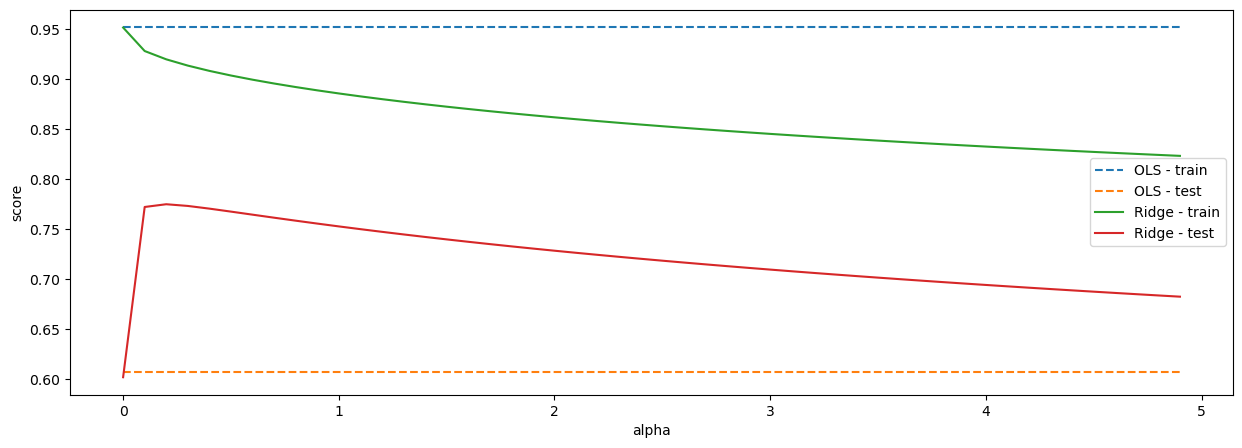

In [21]:
plt.figure(figsize=(15,5))

ridge_scores_train = []
ridge_scores_test = []

alphas = np.arange(0, 5, .1)

ols = LinearRegression().fit(x_train, y_train)

# ols.score(x_test, y_test)

for alpha in alphas:
    rr = Ridge(alpha=alpha).fit(x_train, y_train)
    ridge_scores_train.append(rr.score(x_train, y_train))
    ridge_scores_test.append(rr.score(x_test, y_test))

plt.plot(alphas, ols.score(x_train, y_train) * np.ones(len(alphas)), '--', label='OLS - train')
plt.plot(alphas, ols.score(x_test, y_test) * np.ones(len(alphas)), '--', label='OLS - test')

plt.plot(alphas, ridge_scores_train, label='Ridge - train')
plt.plot(alphas, ridge_scores_test, label='Ridge - test')

plt.legend()

plt.ylabel('score')
plt.xlabel('alpha')

plt.show()

### Exercises

1. Fix $\alpha = 0.1$ and then investigate how the size of the training dataset affects the score
1. Do a similar study but with "scalling" and "polynomial combinations of the features" done individually. 

## Applying Lasso Regression on the extended Boston dataset)
Just to recall, the optimization objective for Lasso is:
$\frac{1}{2  n_{samples}}  ||y - Xw||^2_2 + \alpha  ||w||_1$

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [22]:
lr = Lasso(alpha=.01).fit(x_train, y_train)

print("rr.coef_: {}".format(lr.coef_))
print("rr.intercept_: {}".format(lr.intercept_))

rr.coef_: [ -0.          -0.          -0.           0.          -0.
   0.          -0.          -5.26738785  12.10588323   0.
   0.           0.          -0.          -0.          -0.
  -0.           0.          -0.          -0.          -0.
  -0.          -8.7339351   -0.          -0.          -0.
  -0.           2.15103788  -0.           0.          -0.
   0.          -0.           0.          -0.          -0.
   0.          -0.          -0.           0.           0.
   0.          -0.           0.          -4.35203327   0.
   7.1281692   -0.          -0.          -0.           0.
  -4.24418904  -2.13759705   3.62315289  -0.           4.33905522
   0.           0.           0.24991207  -0.          -1.49267644
  -4.17947565  -0.          -0.          -1.3555833   -0.
  -2.17291087  -0.          -0.          29.98909728  -2.10143001
   0.         -12.90558796 -10.60647212 -11.458721    12.84161819
 -10.82178808  -0.          -0.           3.35945197   0.
  -0.          -0.          -8

/Users/pcardoso/anaconda3/envs/IDC_env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.690e+01, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


In [23]:
print("Training set score: {:.2f}".format(lr.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(x_test, y_test)))
print("Number of features used: {}".format(np.sum(lr.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 32


As you can see, keeping the default parameters, Lasso does quite badly, both on the training and the test set. This
indicates that we are underfitting, and we find that it used only 4 of the 105 features. 

But if we change the alpha parameter...

In [24]:
lr = Lasso(alpha=0.01, max_iter=10000).fit(x_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("Training set score: {:.2f}".format(lr.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(x_test, y_test)))
print("Number of features used: {}".format(np.sum(lr.coef_ != 0)))

lr.coef_: [ -0.          -0.          -0.           0.          -0.
   0.          -0.          -1.43260465  10.94771183   0.
   0.           0.          -0.39260971  -0.          -0.
  -0.           0.          -0.          -0.          -0.
  -0.          -8.75628457  -0.          -0.          -0.
  -0.           2.10027365  -0.           0.          -0.
   0.          -0.           0.           0.          -0.
   0.          -0.          -0.           0.           0.
   0.          -0.           0.          -3.96958293   0.
   6.61845793  -0.          -0.          -0.           0.
  -4.42086828  -2.10371434   3.79607992  -0.           4.38591262
   0.           0.           0.1795777   -0.          -1.1614282
  -4.33485764  -0.          -0.          -2.13549022  -0.
  -1.85967636  -0.          -0.          29.81957225  -2.05624806
   0.         -11.98034348 -11.14870694 -11.67147204  12.974385
 -10.93053676  -0.          -0.           3.441574     0.
  -0.          -0.          -8.56

In [ ]:
plt.figure(figsize=(15, 10))

ridge_scores_train = []
ridge_scores_test = []

lasso_scores_train = []
lasso_scores_test = []

alphas = np.arange(0, 2, .01)

ols = LinearRegression().fit(x_train, y_train)
ols.score(x_test, y_test)

for alpha in alphas:
    rr = Ridge(alpha=alpha).fit(x_train, y_train)
    ridge_scores_train.append(rr.score(x_train, y_train))
    ridge_scores_test.append(rr.score(x_test, y_test))

    lr = Lasso(alpha=alpha, max_iter=100000).fit(x_train, y_train)
    lasso_scores_train.append(lr.score(x_train, y_train))
    lasso_scores_test.append(lr.score(x_test, y_test))

plt.plot(alphas, ols.score(x_train, y_train) * np.ones(len(alphas)), '--', label='OLS - train')
plt.plot(alphas, ols.score(x_test, y_test) * np.ones(len(alphas)), '--', label='OLS - test')

plt.plot(alphas, ridge_scores_train, label='Ridge - train')
plt.plot(alphas, ridge_scores_test, label='Ridge - test')

plt.plot(alphas, lasso_scores_train, label='Lasso - train')
plt.plot(alphas, lasso_scores_test, label='Lasso - test')

plt.legend(loc='lower right')

plt.grid(True)

plt.ylabel('score')
plt.xlabel('alpha')

plt.show()

/Users/pcardoso/anaconda3/envs/IDC_env/lib/python3.11/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/pcardoso/anaconda3/envs/IDC_env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


A lower alpha allowed us to fit a more complex model, which worked better on the training and test data. The performance is slightly better than using Ridge, and we are using only 33 of the 105 features. This makes this model potentially easier to understand.

# Exercise

Load the diabetes dataset. Note that each of the 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).


* use the first 400 observations to train a linear regression model and predict/verify the disease progression for the remaining 

* For a patiente with values [-0.02367725, -0.04464164,  0.04552903,  0.09072977, -0.01808039, -0.03544706,  0.07072993, -0.03949338, -0.03452372, -0.00936191] predict the disease progression one year after baseline

In [ ]:
from sklearn.datasets import load_diabetes

diab = load_diabetes()

diab
# ...